# 와인 베스트모델 찾기

In [1]:
import numpy as np
import tensorflow as tf

In [2]:
# 실행할 때마다 같은 결과를 출력하기 위한 seed 값 설정
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

### 데이터 전처리

In [3]:
from google.colab import files
file_uploaded = files.upload()

Saving wine.csv to wine.csv


In [5]:
filename = list(file_uploaded.keys())[0]

In [6]:
import pandas as pd
df = pd.read_csv(filename, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [9]:
df[12].unique()

array([1, 0])

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values,stratify=df.iloc[:,-1].values,random_state = seed
)
X_train.shape,X_test.shape

((4872, 12), (1625, 12))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
model = Sequential([
    Dense(24, input_dim=60, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

### 모델 정의 실행

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
model = Sequential([
                    Dense(30,input_dim=12,activation='relu'),
                    Dense(12,activation='relu'),
                    Dense(8,activation='relu'),
                    Dense(1,activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

### 모델 저장 관련 환경 설정

In [14]:
import os
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [15]:
!ls

model  sample_data  wine.csv


In [16]:
# 모델 저장 조건
modelpath = MODEL_DIR + "best{epoch:03d}-{val_loss:.4f}.hdf5"

In [17]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

### 모델 학습

In [18]:
model.fit(X_train, y_train,validation_split=0.2,epochs=200, 
          batch_size=200,verbose=0, callbacks=[checkpointer])


Epoch 00001: val_loss improved from inf to 0.41822, saving model to ./model/best001-0.4182.hdf5

Epoch 00002: val_loss improved from 0.41822 to 0.28623, saving model to ./model/best002-0.2862.hdf5

Epoch 00003: val_loss improved from 0.28623 to 0.24628, saving model to ./model/best003-0.2463.hdf5

Epoch 00004: val_loss improved from 0.24628 to 0.22050, saving model to ./model/best004-0.2205.hdf5

Epoch 00005: val_loss improved from 0.22050 to 0.20001, saving model to ./model/best005-0.2000.hdf5

Epoch 00006: val_loss improved from 0.20001 to 0.19209, saving model to ./model/best006-0.1921.hdf5

Epoch 00007: val_loss improved from 0.19209 to 0.18488, saving model to ./model/best007-0.1849.hdf5

Epoch 00008: val_loss improved from 0.18488 to 0.18360, saving model to ./model/best008-0.1836.hdf5

Epoch 00009: val_loss improved from 0.18360 to 0.17670, saving model to ./model/best009-0.1767.hdf5

Epoch 00010: val_loss improved from 0.17670 to 0.17541, saving model to ./model/best010-0.1754

### 잘못된 평가

In [20]:
acc = model.evaluate(X_test, y_test,)
print(f"Accuracy: {acc[1]:.4f}")

51/51 [==============================] - 0s 853us/step - loss: 0.0712 - accuracy: 0.9791
Accuracy: 0.9791


### 베스트 모델로 평가

In [21]:
from tensorflow.keras.models import load_model
best_model = load_model('./model/best181-0.0530.hdf5')
acc = best_model.evaluate(X_test, y_test)
print(f"Accuracy: {acc[1]:.4f}")

51/51 [==============================] - 0s 897us/step - loss: 0.0747 - accuracy: 0.9778
Accuracy: 0.9778


### 시각화

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
history = model.fit(X_train, y_train,validation_split=0.2,epochs=200, 
          batch_size=200,verbose=0)

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
y_loss = history.history['loss']
y_vacc = history.history['val_accuracy']

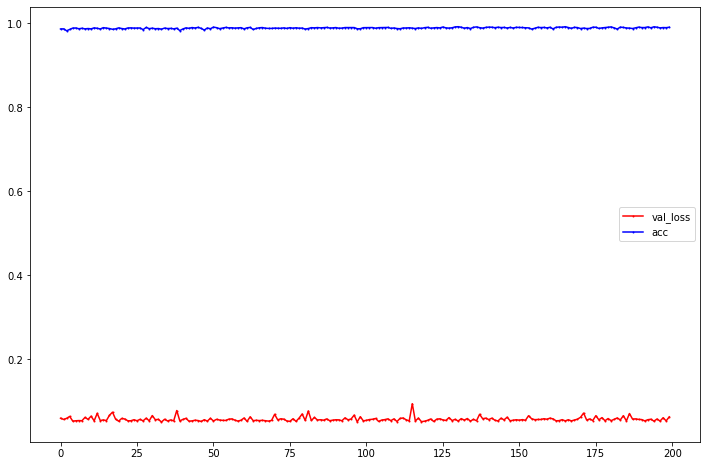

In [31]:
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_vloss, "o-", c='red',markersize=1,label="val_loss")
plt.plot(x_len, y_acc, "o-", c='blue',markersize=1,label="acc")
plt.legend()
plt.show()